In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Input

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column

Text(0, 0.5, 'Number of Passengers')

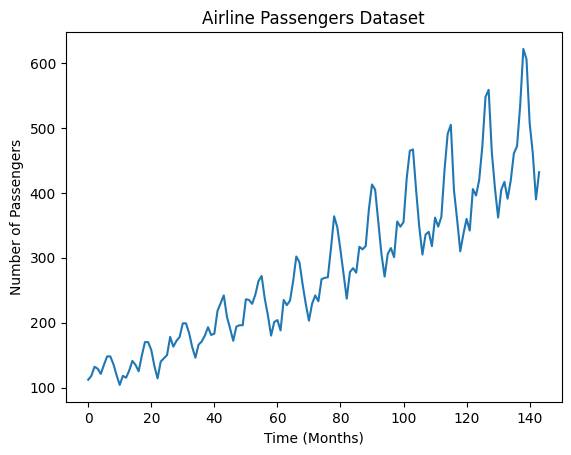

In [4]:
# Visualize the dataset
plt.plot(data)
plt.title('Airline Passengers Dataset')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Passengers')

In [5]:
# Preprocessing the data

# Normalize the dataset (MinMaxScaler scales the data to the range [0,1])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences from the dataset
def create_sequences(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

# Set time step (number of months to use for prediction)
time_step = 12
X, y = create_sequences(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required by RNN
X = X.reshape((X.shape[0], X.shape[1], 1))


In [6]:
# Split the data into training and test sets (no need for a separate holdout set)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
# Build the RNN model
model = Sequential([
    Input(shape=(time_step, 1)),  # Explicit Input layer
    SimpleRNN(50, return_sequences=False),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
epochs = 50
batch_size = 16

print("Training the model...")
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Training the model...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - loss: 0.0305 - val_loss: 0.0222
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0110 - val_loss: 0.0662
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0057 - val_loss: 0.0092
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0039 - val_loss: 0.0175
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0024 - val_loss: 0.0220
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0013 - val_loss: 0.0126
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0010 - val_loss: 0.0124
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0010 - val_loss: 0.0077
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 8.8537e-04 - val_loss: 0.0125
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 7.9459e-04 - val_loss: 0.0085
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step 

In [12]:
# Evaluate the model on the test data
print("Evaluating the model on the test set...")
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Evaluating the model on the test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step - loss: 0.0046
Test Loss: 0.004645252600312233


In [13]:
# Predict future values using the test set
predicted_test = model.predict(X_test)

# Inverse transform the predicted values back to the original scale
predicted_test = scaler.inverse_transform(predicted_test.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Inverse transform the training set to its original values
train_data_plot = scaler.inverse_transform(scaled_data[:train_size])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


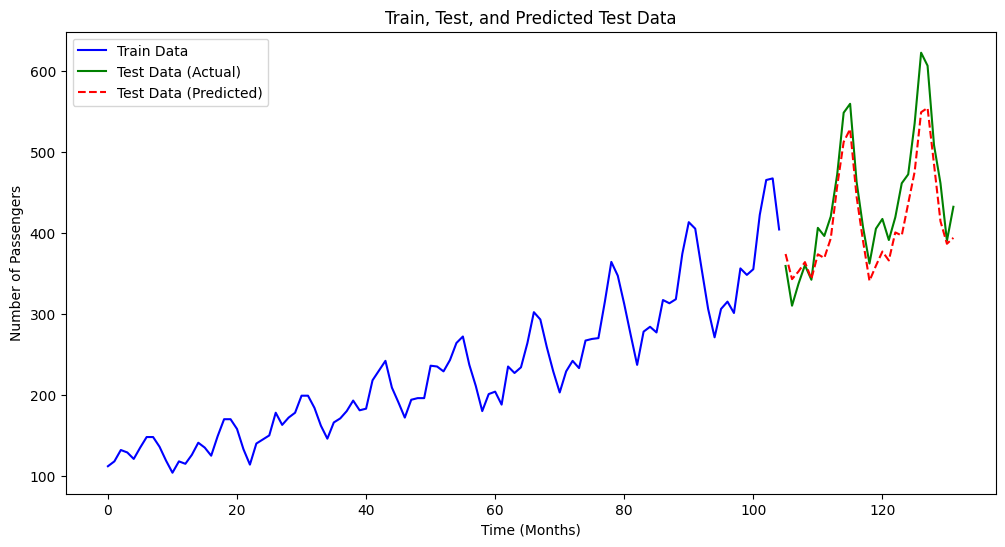

In [14]:
# Prepare indexes to plot correctly
train_index = np.arange(0, len(train_data_plot))
test_index = np.arange(len(train_data_plot), len(train_data_plot) + len(y_test_actual))

# Plot the train set, test set, and predicted test set
plt.figure(figsize=(12, 6))
plt.plot(train_index, train_data_plot, label='Train Data', color='blue')
plt.plot(test_index, y_test_actual, label='Test Data (Actual)', color='green')
plt.plot(test_index, predicted_test, label='Test Data (Predicted)', color='red', linestyle='dashed')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Passengers')
plt.title('Train, Test, and Predicted Test Data')
plt.legend()
plt.show()
